In [1]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

In [2]:
# Cell 2: Load all raw data
data_path = r"C:\Users\ihebm\Desktop\projet\data\raw"

movies = pd.read_csv(os.path.join(data_path, "movies.csv"))
ratings = pd.read_csv(os.path.join(data_path, "ratings.csv"))
tags = pd.read_csv(os.path.join(data_path, "tags.csv"))
links = pd.read_csv(os.path.join(data_path, "links.csv"))

In [3]:
# Cell 3: Overview of core datasets
print("Movies info:")
print(movies.info())
print("\nRatings info:")
print(ratings.info())
print("\nTags info:")
print(tags.info())
print("\nLinks info:")
print(links.info())

Movies info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Ratings info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Tags info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3

In [4]:
# Cell 4: Display first few rows
display(movies.head())
display(ratings.head())
display(tags.head())
display(links.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
# Cell 5: Check for missing values
print("Missing values in Movies:", movies.isnull().sum())
print("Missing values in Ratings:", ratings.isnull().sum())
print("Missing values in Tags:", tags.isnull().sum())
print("Missing values in Links:", links.isnull().sum())

Missing values in Movies: movieId    0
title      0
genres     0
dtype: int64
Missing values in Ratings: userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Missing values in Tags: userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
Missing values in Links: movieId    0
imdbId     0
tmdbId     8
dtype: int64


In [6]:
# Cell 6: Basic statistics for ratings
display(ratings.describe())


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


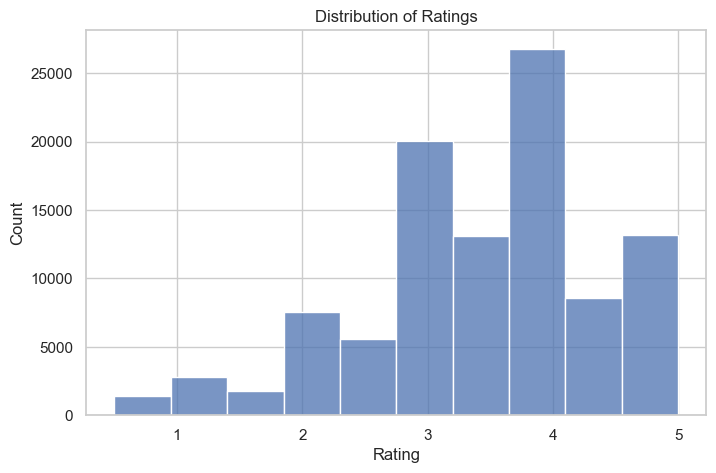

In [7]:
# Cell 7: Distribution of ratings
plt.figure(figsize=(8,5))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


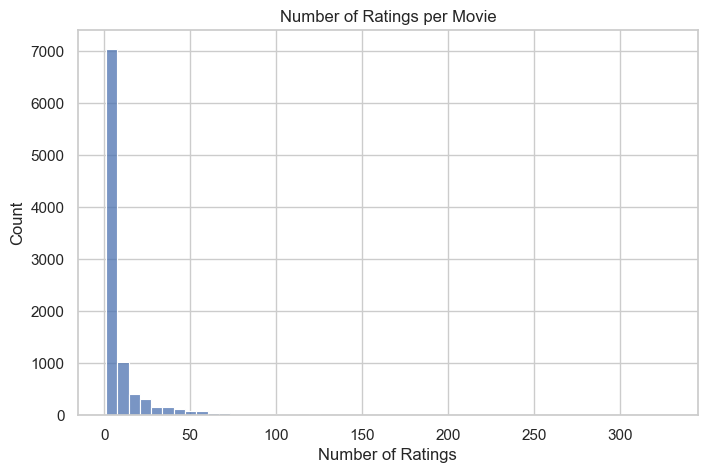

In [8]:
# Cell 8: Number of ratings per movie
ratings_per_movie = ratings.groupby('movieId').size()
plt.figure(figsize=(8,5))
sns.histplot(ratings_per_movie, bins=50)
plt.title("Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Count")
plt.show()


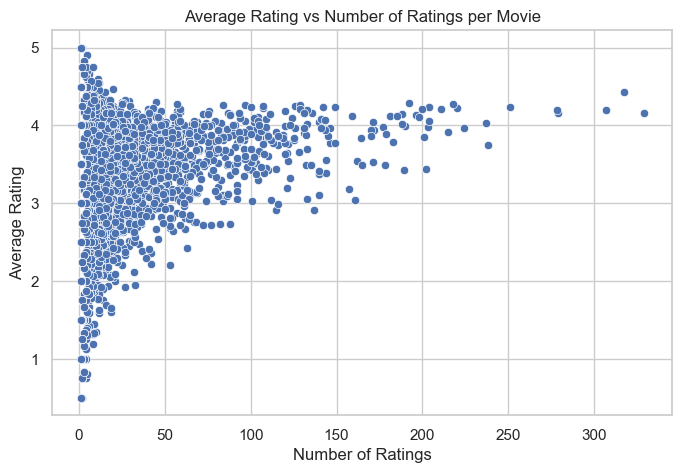

In [9]:
# Cell 9: Average rating vs number of ratings per movie
avg_ratings = ratings.groupby('movieId')['rating'].mean()
num_ratings = ratings.groupby('movieId')['rating'].count()
plt.figure(figsize=(8,5))
sns.scatterplot(x=num_ratings, y=avg_ratings)
plt.title("Average Rating vs Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()


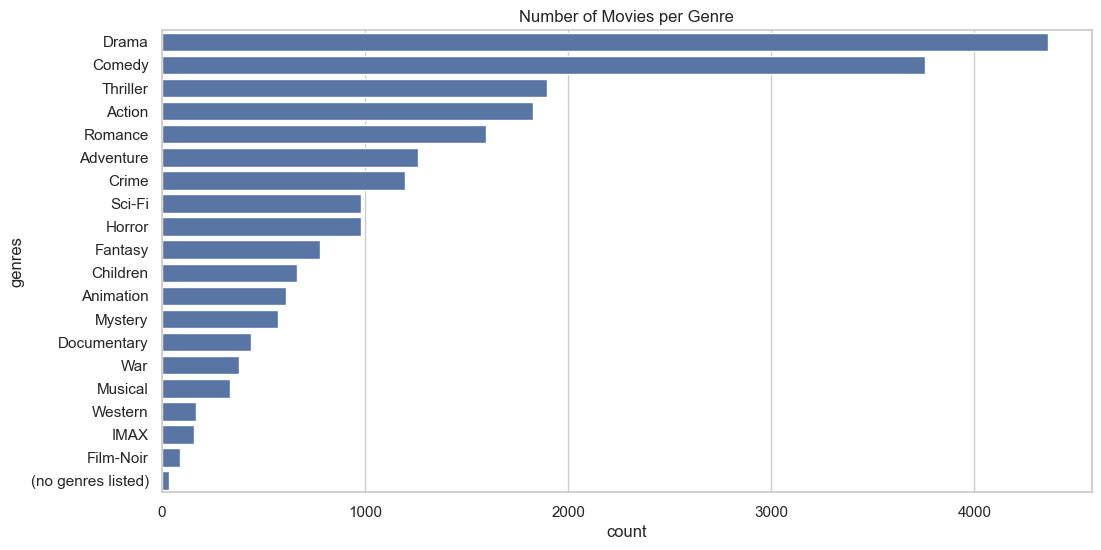

In [10]:
# Cell 10: Count of movies per genre
movies_exploded = movies.copy()
movies_exploded['genres'] = movies_exploded['genres'].str.split('|')
movies_exploded = movies_exploded.explode('genres')
plt.figure(figsize=(12,6))
sns.countplot(y="genres", data=movies_exploded, order=movies_exploded['genres'].value_counts().index)
plt.title("Number of Movies per Genre")
plt.show()

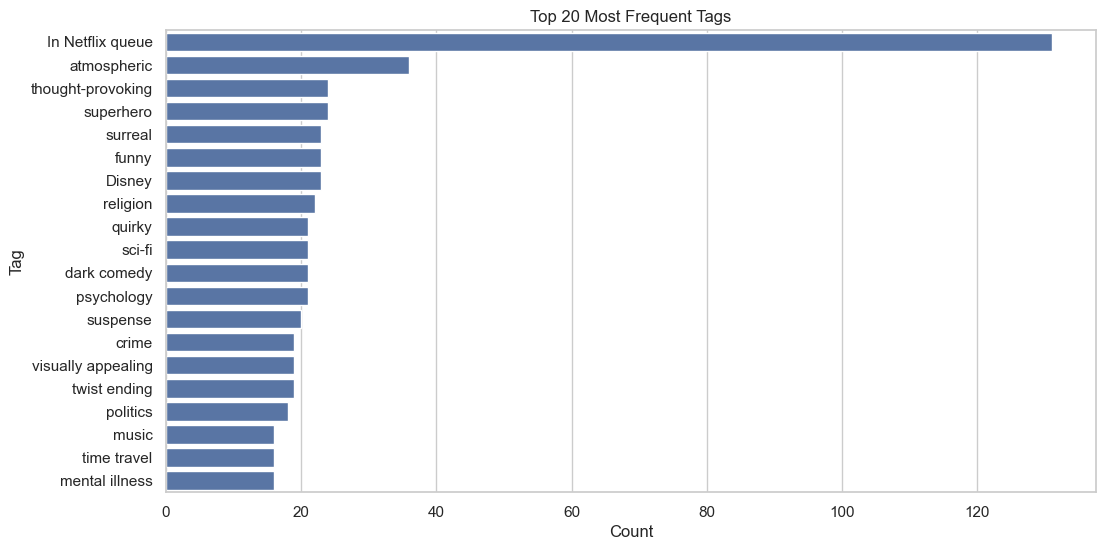

In [11]:
# Cell 11: Most frequent tags
top_tags = tags['tag'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title("Top 20 Most Frequent Tags")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()

In [12]:
# Cell 12: Links overview (optional)
print("Links info:")
print(links.info())
display(links.head())

Links info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [13]:
# Cell 13: Insights summary
print("EDA Insights Summary:")
print("- Core datasets (movies, ratings, tags) explored with distributions and missing values checked.")
print("- Ratings concentrated mostly between 3-4; some movies have very few ratings.")
print("- Genres and tags distributions identified for feature engineering.")
print("- Links dataset available for optional enrichment or display purposes.")

EDA Insights Summary:
- Core datasets (movies, ratings, tags) explored with distributions and missing values checked.
- Ratings concentrated mostly between 3-4; some movies have very few ratings.
- Genres and tags distributions identified for feature engineering.
- Links dataset available for optional enrichment or display purposes.
